Sukhdeep Kaur

Lab 11, Date May 2nd, 2025

In [31]:
# import kagglehub
# import shutil

# # Download latest version
# path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

# #move the dowload to the current directory
# shutil.move(path, "./Lab_11_dataset")

In [32]:
!pip install seaborn

^C



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------- ----- 9.4/11.1 MB 50.1 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 38.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ------------ --------------------------- 12.6/41.0 MB 60.3 MB/s eta 0:00:01
   ----------------------- ---------------- 24.1/41.0 MB 57.1 MB/s eta 0:00:01
   ------------------------------------ --- 37.7/41.0 MB 59.6 MB/s eta 0:00:01
   ---------------------------------------  40.9/41.0 MB 59.8 MB/s eta 0:00:01
   ---------------------------------------- 41.0/41.0 MB 46.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
# loading the dataset
df = pd.read_csv("student_depression_dataset.csv")
df.dropna(axis=1, how='all', inplace=True)
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
print(df.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [ ]:
df.columns = df.columns.str.strip()
for col in df.columns:
    if df[col].astype(str).str.strip().eq('').all():
        df.drop(columns=[col], inplace=True)
if 'Sleep Duration' in df.columns:
    df['Sleep Duration'] = df['Sleep Duration'].astype(str).str.strip().str.replace(r'[^0-9.]', '', regex=True)
    df['Sleep Duration'] = pd.to_numeric(df['Sleep Duration'], errors='coerce')

for col in ['Age', 'CGPA']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

required_cols = ['Age', 'CGPA', 'Sleep Duration']
df.dropna(subset=required_cols, inplace=True)

if 'Depression' in df.columns:
    df['Depression'] = df['Depression'].map({'Yes': 1, 'No': 0})
if 'Have you ever had suicidal thoughts ?' in df.columns:
    df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
if 'Family History of Mental Illness' in df.columns:
    df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

print("Cleaned dataset:")
print(df.head())
print(f"Remaining rows after cleaning: {len(df)}")


Cleaned dataset:
   id  Gender   Age           City Profession  Academic Pressure  \
0   2       1  33.0  Visakhapatnam    Student                5.0   
1   8       0  24.0      Bangalore    Student                2.0   
2  26       1  31.0       Srinagar    Student                3.0   
3  30       0  28.0       Varanasi    Student                3.0   
4  32       0  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  Sleep Duration  \
0            0.0  8.97                 2.0               0.0            56.0   
1            0.0  5.90                 5.0               0.0            56.0   
2            0.0  7.03                 5.0               0.0             5.0   
3            0.0  5.59                 2.0               0.0            78.0   
4            0.0  8.13                 3.0               0.0            56.0   

  Dietary Habits   Degree  Have you ever had suicidal thoughts ?  \
0        Healthy  B.Pharm

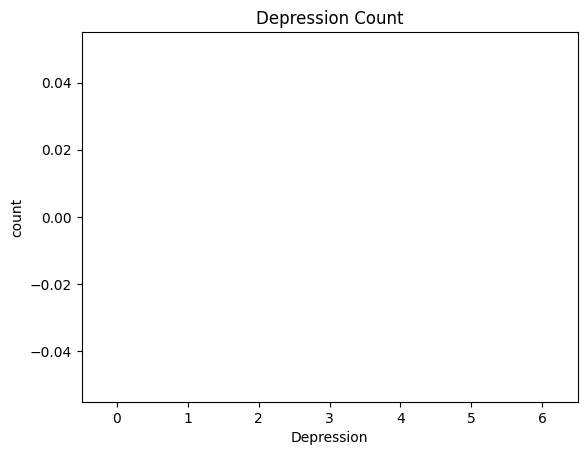

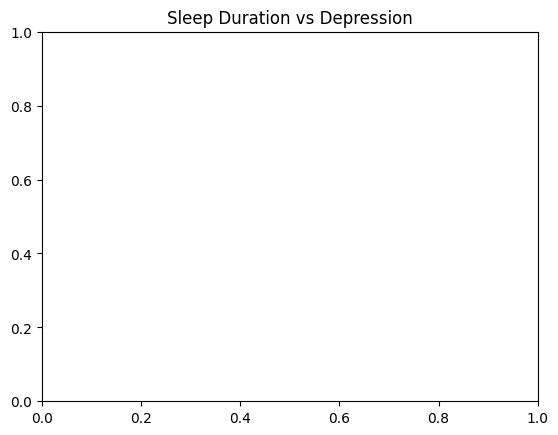

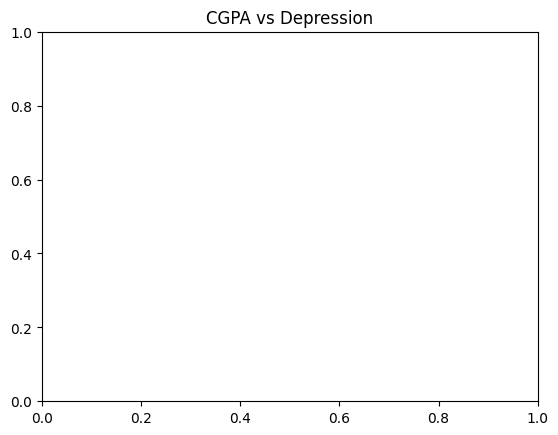

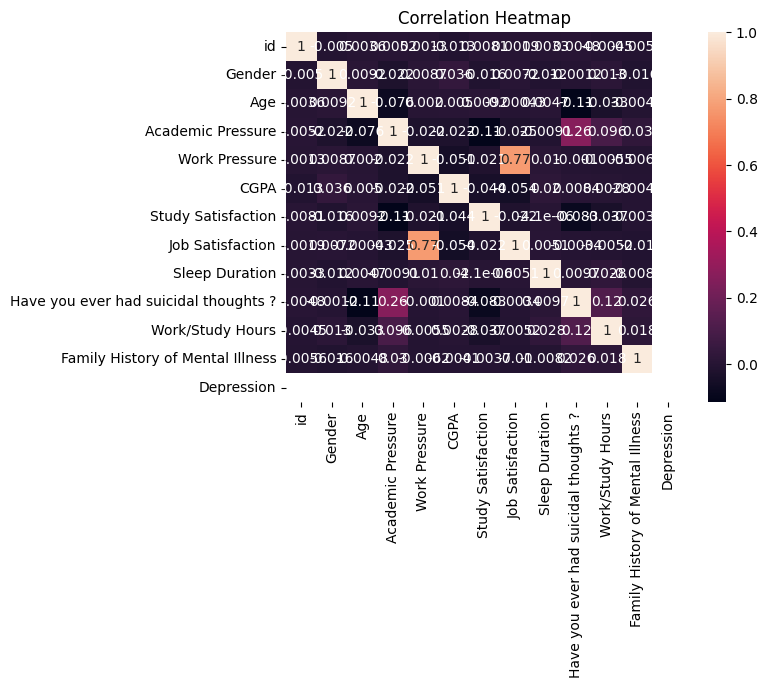

In [ ]:
if 'Depression' in df.columns:
    sns.countplot(x='Depression', data=df)
    plt.title("Depression Count")
    plt.show()

    sns.boxplot(x='Depression', y='Sleep Duration', data=df.dropna(subset=['Depression', 'Sleep Duration']))
    plt.title("Sleep Duration vs Depression")
    plt.show()

    sns.boxplot(x='Depression', y='CGPA', data=df.dropna(subset=['Depression', 'CGPA']))
    plt.title("CGPA vs Depression")
    plt.show()

numeric_data = df.select_dtypes(include='number')
if not numeric_data.empty:
    sns.heatmap(numeric_data.corr(), annot=True)
    plt.title("Correlation Heatmap")
    plt.show()

In [ ]:
features = ['Age', 'Gender', 'CGPA', 'Sleep Duration',
            'Have you ever had suicidal thoughts ?',
            'Family History of Mental Illness']

if all(f in df.columns for f in features + ['Depression']):
    if df[features + ['Depression']].isnull().any().any():
        print("Missing values detected in the dataset.")
        df = df.dropna(subset=features + ['Depression'])
       
    y = df['Depression']

    if len(df) > 1:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

        model = DecisionTreeRegressor()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print("MAE:", mean_absolute_error(y_test, y_pred))
        print("R^2 Score:", r2_score(y_test, y_pred))

        for drop_feature in features:
            X_new = X.drop(columns=[drop_feature])
            X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.2, random_state=1)
            model2 = DecisionTreeRegressor()
            model2.fit(X_train2, y_train2)
            y_pred2 = model2.predict(X_test2)
            print(f"\nWithout {drop_feature}:")
            print("MAE:", mean_absolute_error(y_test2, y_pred2))
            print("R^2 Score:", r2_score(y_test2, y_pred2))
    else:
        print("Not enough data to perform modeling.")
else:
    print("Required columns missing for modeling.")


Not enough data to perform modeling.


2nd Try ;(

First 5 rows:
   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy     

c:\Users\esska\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


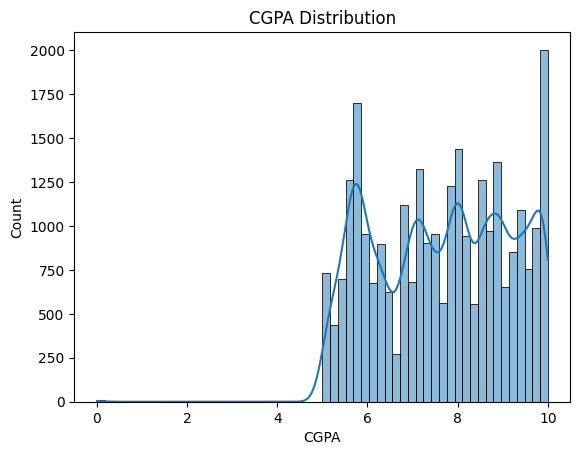

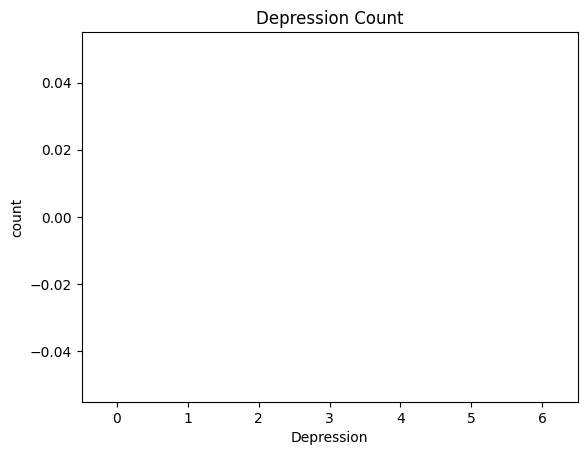

ValueError: List of boxplot statistics and `positions` values must have same the length

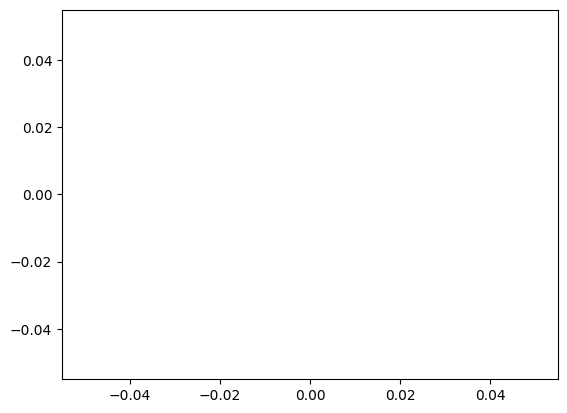

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv("student_depression_dataset.csv")

print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

numeric_cols = ["Age", "CGPA", "Sleep Duration", "Work/Study Hours"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")  
    df[col] = df[col].fillna(df[col].median()) 

binary_cols = ["Depression", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

df = pd.get_dummies(df, columns=["Gender", "City", "Degree", "Profession"], drop_first=True)

print("\nRows after cleaning:", len(df))

sns.histplot(df["CGPA"], kde=True)
plt.title("CGPA Distribution")
plt.show()

sns.countplot(x="Depression", data=df)
plt.title("Depression Count")
plt.show()

sns.boxplot(x="Depression", y="Sleep Duration", data=df)
plt.title("Sleep Duration vs Depression")
plt.show()

sns.boxplot(x="Depression", y="Work/Study Hours", data=df)
plt.title("Work/Study Hours vs Depression")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[["CGPA", "Age", "Sleep Duration", "Work/Study Hours", "Depression"]], hue="Depression")
plt.show()

X = df.drop(["Depression"], axis=1)
y = df["Depression"]

train_sizes = [0.2, 0.15, 0.1] 

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_size, random_state=42)

    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(f"\nModel with Test Size {train_size}:")
    print("R² Score:", r2_score(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

drop_columns = ["CGPA", "Financial Stress", "Sleep Duration", "Work/Study Hours"]
for col in drop_columns:
    X_new = X.drop(col, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.15, random_state=42)

    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"\nModel WITHOUT {col}:")
    print("R² Score:", r2_score(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))